Contour Features
================
Goal
----
In this article, we will learn

- To find the different features of contours, like area, perimeter, centroid, bounding box etc
- You will see plenty of functions related to contours.

1. Moments
----------
Image moments help you to calculate some features like center of mass of the object, area of the object etc. Check out the wikipedia page on [Image Moments](http://en.wikipedia.org/wiki/Image_moment)

The function `cv2.moments()` gives a dictionary of all moment values calculated. See below:

Populating the interactive namespace from numpy and matplotlib


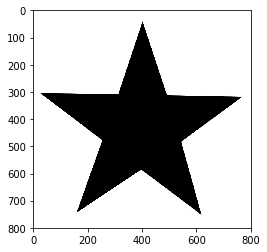

In [1]:
%pylab inline
import cv2
import numpy as np


img = cv2.imread('images/star.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
imshow(img)

imgout, contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)

From this moments, you can extract useful data like area, centroid etc. Centroid is given by the relations, $C_x = \frac{M_{10}}{M_{00}}$ and $C_y = \frac{M_{01}}{M_{00}}$. This can be done as follows:

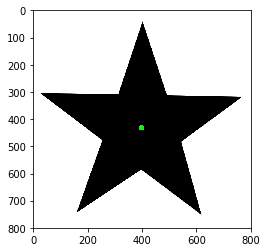

In [2]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img_cent= img.copy()
cv2.circle(img_cent,(cx,cy),10,(0,255,0),-1)
imshow(img_cent)

2. Contour Area
-----------

Contour area is given by the function `cv2.contourArea()` or from moments, `M[‘m00’]`.

In [3]:
area = cv2.contourArea(cnt)
print(str(area) + " pixels squred")

175615.5 pixels squred


3. Contour Perimeter
---
It is also called arc length. It can be found out using `cv2.arcLength()` function. Second argument specify whether shape is a closed contour (if passed `True`), or just a curve.

In [4]:
perimeter = cv2.arcLength(cnt,True)
print(str(perimeter)+" pixels")

2963.912005543709 pixels


4. Contour Approximation
----
It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify. It is an implementation of [Douglas-Peucker](http://en.wikipedia.org/wiki/Ramer-Douglas-Peucker_algorithm) algorithm. Check the wikipedia page for algorithm and demonstration.

To understand this, suppose you are trying to find a square in an image, but due to some problems in the image, you didn’t get a perfect square, but a “bad shape” (As shown in first image below). Now you can use this function to approximate the shape. In this, second argument is called 'epsilon', which is maximum distance from contour to approximated contour. It is an accuracy parameter. A wise selection of 'epsilon' is needed to get the correct output.

Below, in second image, green line shows the approximated curve for epsilon = 10% of arc length. Third image shows the same for epsilon = 1% of the arc length. Third argument specifies whether curve is closed or not.


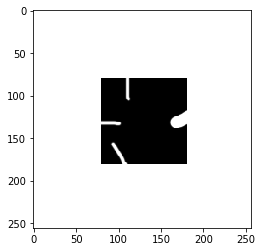

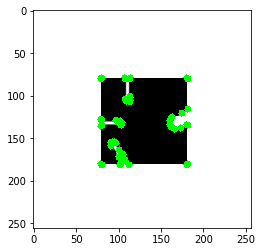

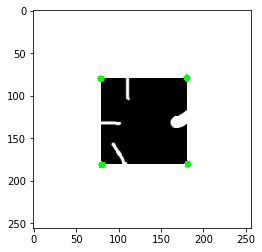

In [5]:
img = cv2.imread('images/bad-square.png')
imgray = cv2.cvtColor(img,cv2.COLOR_RGBA2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
imshow(img)
thresh=imgray

imgout, contours,hierarchy = cv2.findContours(thresh.copy(), mode=cv2.RETR_TREE,method=cv2.CHAIN_APPROX_NONE)
cnt = contours[1]

M = cv2.moments(cnt)
epsilon2 = 0.001*cv2.arcLength(cnt,True)
approx2 = cv2.approxPolyDP(cnt.copy(),epsilon2,True)

epsilon3 = 0.1*cv2.arcLength(cnt,True)
approx3 = cv2.approxPolyDP(cnt.copy(),epsilon3,True)

img2 = img.copy()
img3 = img.copy()
cv2.drawContours(img2, approx2, -1, (0,255,0), 8)
cv2.drawContours(img3, approx3, -1, (0,255,0), 8)

figure(2)
imshow(img2)
figure(3)
imshow(img3)



5. Convex Hull
---

Convex Hull will look similar to contour approximation, but it is not (Both may provide same results in some cases). Here, `cv2.convexHull()` function checks a curve for convexity defects and corrects it. Generally speaking, convex curves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called convexity defects. For example, check the below image of hand. Red line shows the convex hull of hand. The double-sided arrow marks shows the convexity defects, which are the local maximum deviations of hull from contours.

<img src="files/images/convexitydefects.jpg" />

Convex Hull
There is a little bit things to discuss about it its syntax:

`hull = cv2.convexHull(points[, hull[, clockwise[, returnPoints]]`

Arguments details:

- `points` are the contours we pass into.  
- `hull` is the output, normally we avoid it.  
- `clockwise` : Orientation flag. If it is True, the output convex hull is oriented clockwise. Otherwise, it is oriented counter-clockwise.  
- `returnPoints` : By default, True. Then it returns the coordinates of the hull points. If False, it returns the indices of contour points corresponding to the hull points.
So to get a convex hull as in above image, following is sufficient:

`hull = cv2.convexHull(cnt)`
But if you want to find convexity defects, you need to pass returnPoints = False. To understand it, we will take the rectangle image above. First I found its contour as cnt. Now I found its convex hull with returnPoints = True, I got following values: `[[[234 202]], [[ 51 202]], [[ 51 79]], [[234 79]]]` which are the four corner points of rectangle. Now if do the same with returnPoints = False, I get following result: `[[129],[ 67],[ 0],[142]]`. These are the indices of corresponding points in contours. For eg, check the first value: `cnt[129] = [[234, 202]]` which is same as first result (and so on for others).

You will see it again when we discuss about convexity defects.

6. Checking Convexity
---
There is a function to check if a curve is convex or not, `cv2.isContourConvex()`. It just return whether True or False. Not a big deal.

    k = cv2.isContourConvex(cnt)

7. Bounding Rectangle
---
There are two types of bounding rectangles.

7.a. Straight Bounding Rectangle
---
It is a straight rectangle, it doesn’t consider the rotation of the object. So area of the bounding rectangle won’t be minimum. It is found by the function `cv2.boundingRect()`.

Let (x,y) be the top-left coordinate of the rectangle and (w,h) be its width and height.

    


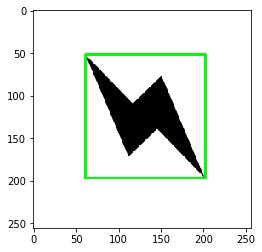

In [6]:
img = cv2.imread('images/lightning.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)

imgout, contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]

x,y,w,h = cv2.boundingRect(cnt)
img_bound=img.copy();
cv2.rectangle(img_bound,(x,y),(x+w,y+h),(0,255,0),2)
imshow(img_bound)

7.b. Rotated Rectangle
---
Here, bounding rectangle is drawn with minimum area, so it considers the rotation also. The function used is `cv2.minAreaRect()`. It returns a Box2D structure which contains following detals - ( top-left `corner(x,y)`, (width, height), angle of rotation ). But to draw this rectangle, we need 4 corners of the rectangle. It is obtained by the function `cv2.boxPoints()`

In [16]:
rect = cv2.minAreaRect(cnt)
box = cv2.cv.BoxPoints(rect)
box = np.int0(box)
im_rot_box=img.copy()
cv2.drawContours(im_rot_box,[box],0,(0,0,255),2)
imshow(im_rot_box);

AttributeError: module 'cv2' has no attribute 'cv'

8. Minimum Enclosing Circle
---
Next we find the circumcircle of an object using the function cv2.minEnclosingCircle(). It is a circle which completely covers the object with minimum area.


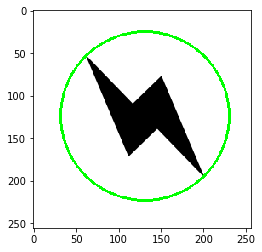

In [17]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
circled = img.copy()
cv2.circle(circled,center,radius,(0,255,0),2)
imshow(circled)

9. Fitting an Ellipse
---
Next one is to fit an ellipse to an object. It returns the rotated rectangle in which the ellipse is inscribed.

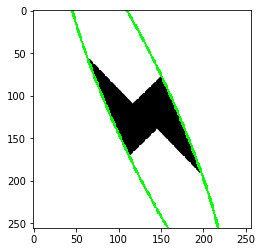

In [18]:
ellipse = cv2.fitEllipse(cnt)
ellipse_img = img.copy();
cv2.ellipse(ellipse_img,ellipse,(0,255,0),2)
imshow(ellipse_img)

10. Fitting a Line
---
Similarly we can fit a line to a set of points. Below image contains a set of white points. We can approximate a straight line to it.

In [20]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.CV_DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
line_img = img.copy()
cv2.line(line_img,(cols-1,righty),(0,lefty),(0,255,0),2)
imshow(line_img)

AttributeError: module 'cv2' has no attribute 'CV_DIST_L2'